# MolecularData file generation
In this tutorial, we show how to generate the MolecularData files which are fed into the Qu & Co Chemistry package as a primer.
In this first example, we generate a hydrogen molecule file, ab-initio with the following parameters. We set the basis to minimal-sto basis STO-3G, there is no charge and multiplicity=1, we configure the diatomic molecule in a geometry with 0.7414 Angstrom distance between the hydrogen atoms, and we store the generated files locally. Of course you can also directly use the molecule object henceforth. Please refer to our other tutorial to get started using VQE for chemistry.

In [1]:
from openfermionpyscf import run_pyscf
from openfermion.hamiltonians import MolecularData

In [2]:
# Set molecule parameters and desired basis.
basis = 'sto-3g'
multiplicity = 1

# Set calculation parameters.
run_scf = 1
run_mp2 = 1
run_cisd = 1
run_ccsd = 1
run_fci = 1

#equilibrium spacing in Angstrom
spacing = 0.7414

geometry = [('H', (0., 0., 0.)), ('H', (0., 0., spacing))]
description = 'H2_pyscf_equilibrium'
molecule = MolecularData(geometry, basis, multiplicity,description=description)

molecule.filename = 'molecules/'+description #location of the .hdf5 file to store the data in

# Run PySCF to add the data.
molecule = run_pyscf(molecule,
                        run_scf=run_scf,
                        run_mp2=run_mp2,
                        run_cisd=run_cisd,
                        run_ccsd=run_ccsd,
                        run_fci=run_fci) 
molecule.save()

print('HF energy:   ',molecule.hf_energy)
print('CCSD energy: ',molecule.ccsd_energy)
print('FCI energy:  ',molecule.fci_energy)
E_min = molecule.fci_energy

HF energy:    -1.1166843870853396
CCSD energy:  -1.137270340640917
FCI energy:   -1.1372701746609026


We output the groundstate energy estimations calculated with different classical approaches: Hartree-Fock method, the Coupled Cluster with Single and Double excitations method, and the Full Configuration Interaction method (FCI). 

In the next example, we load the hydrogen molecular data for different spatial configurations. For a diatomic molecule, the only degree of freedom is the spacing between the atoms, which we vary from 0.1 to 3.0 to generate the familiar disassociation energy profile.

In [3]:
#H2 spacing
spacing = 0.1,0.15,0.2,0.25,0.3,0.4,0.5,0.6,0.7,0.74,0.75,0.8,0.85,0.9,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2.0,2.2,2.4,2.6,2.8,3.0

E_fci=[]
E_hf=[]
E_ccsd=[]

for i, space in enumerate(spacing):
    #construct molecule data storage object 
    geometry = [('H', (0., 0., 0.)), ('H', (0., 0., space))]
    molecule = MolecularData(geometry, basis, multiplicity,description='pyscf_H2_' + str(space*100))

    molecule.filename = 'molecules/H2/H2_pyscf_' + str(space)[0] +'_' +str(space)[2:] #location of the .hdf5 file to store the data in

    # Run PySCF to add the data.
    molecule = run_pyscf(molecule,
                        run_scf=run_scf,
                        run_mp2=run_mp2,
                        run_cisd=run_cisd,
                        run_ccsd=run_ccsd,
                        run_fci=run_fci) #extra output will be in a verbose .out file
    molecule.save()
    
    E_fci.append(molecule.fci_energy)
    E_hf.append(molecule.hf_energy)
    E_ccsd.append(molecule.ccsd_energy)
    

We plot the results below:

<IPython.core.display.Javascript object>


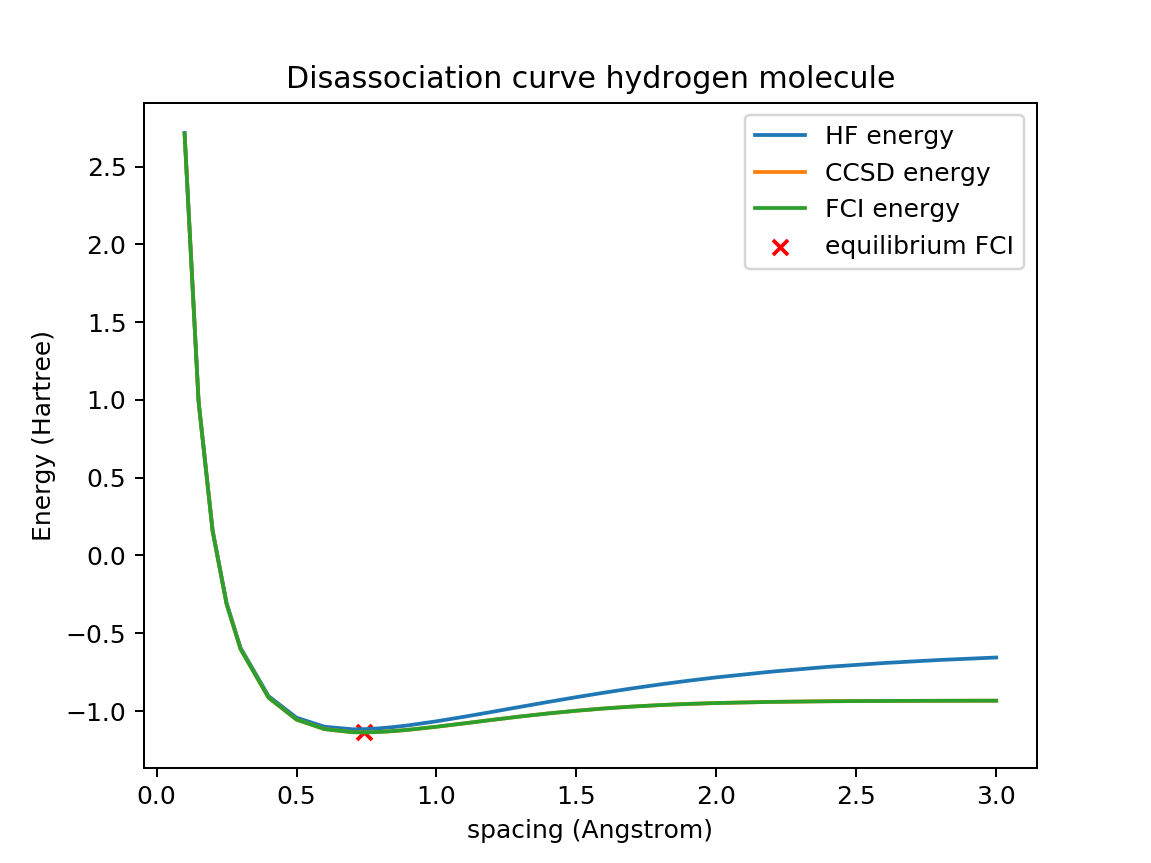

In [4]:
%matplotlib notebook

import matplotlib.pyplot as plt

spacing = 0.1,0.15,0.2,0.25,0.3,0.4,0.5,0.6,0.7,0.74,0.75,0.8,0.85,0.9,1,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2.0,2.2,2.4,2.6,2.8,3.0

plt.figure()
plt.plot(spacing,E_hf,label='HF energy')
plt.plot(spacing,E_ccsd,label='CCSD energy')
plt.plot(spacing,E_fci,label='FCI energy')
plt.scatter(0.7414, E_min,color='red',marker='x',label='equilibrium FCI')
plt.xlabel('spacing (Angstrom)')
plt.ylabel('Energy (Hartree)')
plt.title('Disassociation curve hydrogen molecule')
plt.legend()